## Exercise 5

In this homework we will try to confuse a pretrained network with crazy transformations


In [1]:
import matplotlib.pyplot as plt
import numpy as np

import torchvision.transforms as transforms
import torchvision as torchvision

from datetime import datetime
import datetime
import random

In [2]:
import torch
from torch import nn
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# Download our "dataset" - its really just some cat and dog images
!wget https://github.com/CS4MS/CS4MS_W23/raw/main/images/cat.jpg
!wget https://github.com/CS4MS/CS4MS_W23/raw/main/images/cat2.jpg
!wget https://github.com/CS4MS/CS4MS_W23/raw/main/images/cat3.jpg
!wget https://github.com/CS4MS/CS4MS_W23/raw/main/images/cat4.jpg
!wget https://github.com/CS4MS/CS4MS_W23/raw/main/images/cat5.jpg
!wget https://github.com/CS4MS/CS4MS_W23/raw/main/images/cat6.jpg
!wget https://github.com/CS4MS/CS4MS_W23/raw/main/images/cat7.jpg
!wget https://github.com/CS4MS/CS4MS_W23/raw/main/images/cat8.jpg
!wget https://github.com/CS4MS/CS4MS_W23/raw/main/images/cat9.jpg
!wget https://github.com/CS4MS/CS4MS_W23/raw/main/images/dog1.jpg
!wget https://github.com/CS4MS/CS4MS_W23/raw/main/images/dog2.jpg

cpu
--2023-11-21 15:43:47--  https://github.com/CS4MS/CS4MS_W23/raw/main/images/cat.jpg
Resolving github.com (github.com)... 140.82.121.4, 205.251.194.8, 205.251.193.165, ...
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CS4MS/CS4MS_W23/main/images/cat.jpg [following]
--2023-11-21 15:43:47--  https://raw.githubusercontent.com/CS4MS/CS4MS_W23/main/images/cat.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50718 (50K) [image/jpeg]
Saving to: ‘cat.jpg’

cat.jpg             100%[===================>]  49.53K  --.-KB/s    in 0.1s    

2023-11-21 15:43:48 (499 KB/s) - ‘cat.jpg’ saved [50718/50718]

--2023-11-21 15:43:49--  https://github.com/CS

HTTP request sent, awaiting response... 200 OK
Length: 1073424 (1.0M) [image/jpeg]
Saving to: ‘cat9.jpg’

cat9.jpg            100%[===================>]   1.02M  1.21MB/s    in 0.8s    

2023-11-21 15:44:01 (1.21 MB/s) - ‘cat9.jpg’ saved [1073424/1073424]

--2023-11-21 15:44:02--  https://github.com/CS4MS/CS4MS_W23/raw/main/images/dog1.jpg
Resolving github.com (github.com)... 140.82.121.4, 205.251.194.8, 205.251.193.165, ...
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CS4MS/CS4MS_W23/main/images/dog1.jpg [following]
--2023-11-21 15:44:02--  https://raw.githubusercontent.com/CS4MS/CS4MS_W23/main/images/dog1.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response.

In [3]:
from PIL import Image

file_names = ["cat.jpg", "cat2.jpg", "cat3.jpg", "cat4.jpg", "cat5.jpg", "cat6.jpg", "cat7.jpg", "cat8.jpg", "cat9.jpg", "dog1.jpg", "dog2.jpg"]

def imshow(img):
    npimg = img.numpy()
    fig, ax = plt.subplots(figsize=(30, 30))
    ax.axis('off')
    ax.imshow(np.transpose(npimg, (1, 2, 0)))

cats_org = []
for i in file_names:
  temp_im = Image.open(i)
  cats_org.append(temp_im)

cats_labels = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1] # The value is one if there is an outlier e.g. a dog. So cat=0 and dog=1
cats_labels = np.asarray(cats_labels)
print(f"cats_labels: {cats_labels}")

cats_labels: [0 0 0 0 0 0 0 0 0 1 1]


In [4]:
norm_mean = (0.485, 0.456, 0.406)
norm_std = (0.229, 0.224, 0.225)

# Standard transform we learned in the last lecture
cat_transform = transforms.Compose([
                                  # resize image to the network input size
                                  transforms.Resize((224,224)),
                                  transforms.ToTensor(),
                                  transforms.Normalize(norm_mean, norm_std),
                                   ])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


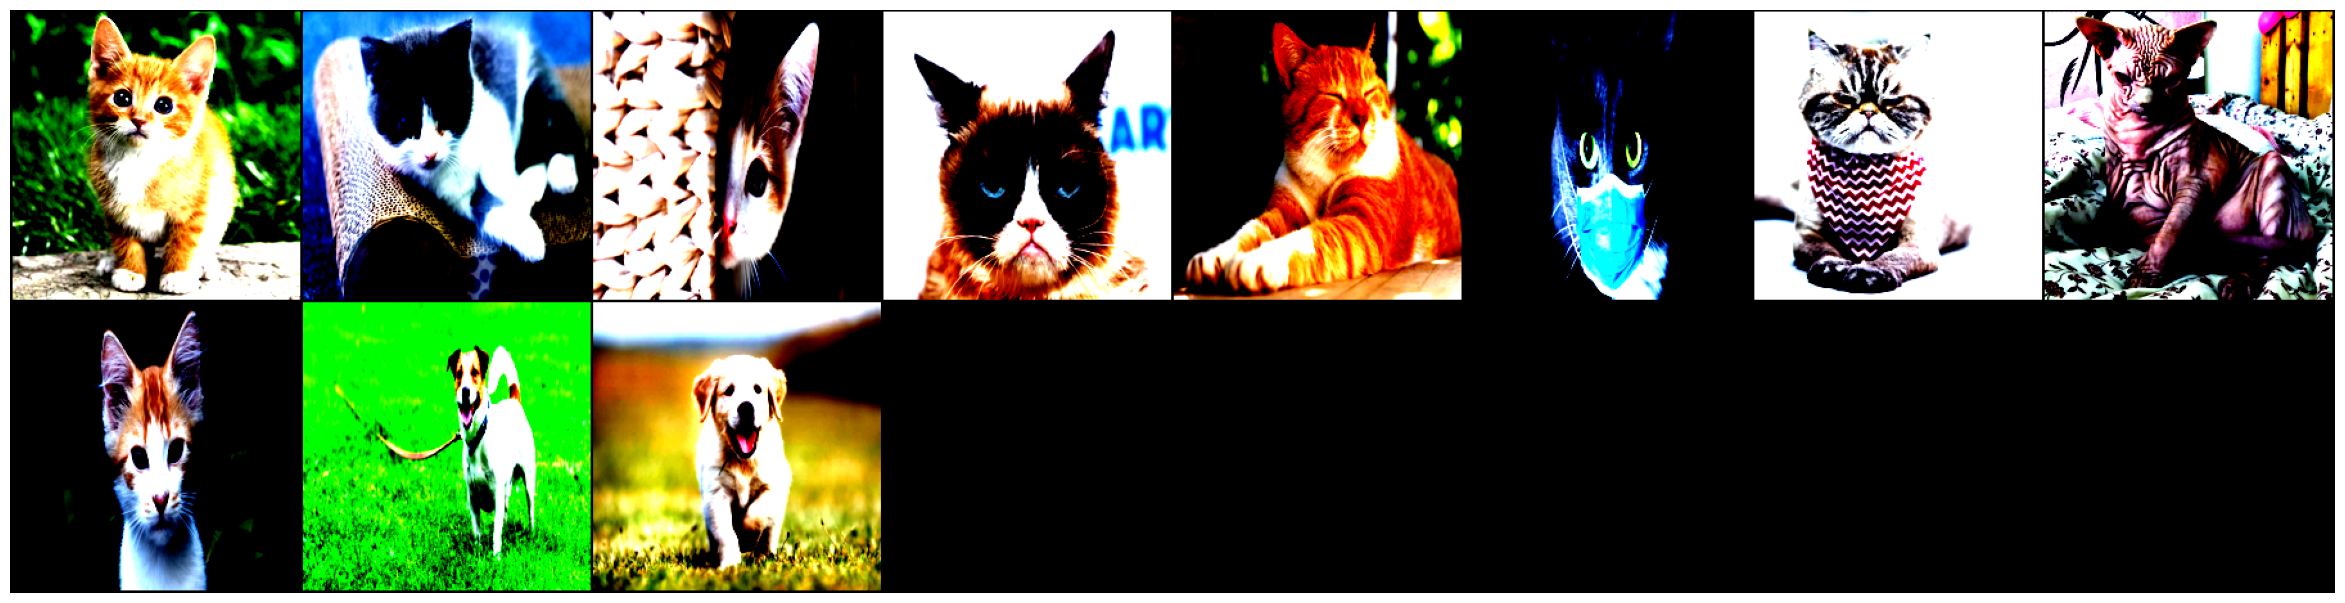

In [5]:
# As you can see the two last pictures are not cats but dogs.

cats = []

for i in cats_org:
  cats.append(cat_transform(i))

imshow(torchvision.utils.make_grid(cats))
cats_tensor = torch.stack(cats)

In [6]:
## Loading a Neural Network
model = torchvision.models.resnet18(pretrained = False) # This is a very well known network but it is designed for 1000 classes and not just cats and dogs this is why we need the next line
model.fc = nn.Sequential(nn.Linear(512,256),
                         nn.ReLU(),
                         nn.Dropout(0.2),
                         nn.Linear(256,2),
                         nn.LogSoftmax(dim=1))

/home/fabi/anaconda3/envs/vis_pyvista/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/home/fabi/anaconda3/envs/vis_pyvista/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [7]:
state_dict_trained = torch.hub.load_state_dict_from_url('https://github.com/CS4MS/CS4MS_W23/raw/main/data/dogs-vs-cats.pth', map_location = device) # This is a checkpoint to a trained cat and dog model that works pretty well

model.load_state_dict(state_dict_trained["state_dict"]) ## Here we load the trained weights (state_dict) in our model 
model.eval() # This puts our model in eval mode

Downloading: "https://github.com/CS4MS/CS4MS_W23/raw/main/data/dogs-vs-cats.pth" to /home/fabi/.cache/torch/hub/checkpoints/dogs-vs-cats.pth


HTTPError: HTTP Error 404: Not Found

In [ ]:
# Lets try the model
with torch.no_grad(): # during testing we dont learn so we dont need to calculate the gradient for learning
  outputs=model(cats_tensor) # That is a forward pass to a network
outputs = torch.exp(outputs) # transform the output to probabilities
pred = torch.argmax(outputs, dim=1).cpu().numpy()  # here we take the highest probabily and get the index 0 was cat and 1 was dog

# Lets checkout the predictions of the network
print(f"outputs: {outputs}")
print(f"pred: {pred}")
# [0.8978, 0.1022] means that the network thinks that the true class is index 0 with a probably of (89%)

In [ ]:
# Lets make accuracies out of this
acc = np.sum(cats_labels == pred, dtype=float) # here we compare the TRUE cats_labels with the PREDICTED pred and sum up how often pred was correct
acc = acc/len(pred)  # here we divide by lenght to get the ratio between correctly classified and total amount of images

print(f"The Accuracy is {acc * 100}%")
# As you can see the network predicted all cats and all dogs correctly...

# Homework
Modify the Transformation so that the resulting accuracy drops below 100%
This might a bit challenging. Try to find an augmentation that screws up the accuracy while we humans can still recognize the contents.

Feel free to check out different augmentation libraries like albumentations : https://github.com/albumentations-team/albumentations

Once your acc drops below 1.0 your submit your homework.

In [ ]:
###### TODO START #######
# Add or remove transformations to confuse the prediction
confuse_transform = transforms.Compose([
                                  # resize image to the network input size
                                  transforms.Resize((224,224)),
                                  transforms.ToTensor(),
                                  transforms.RandomVerticalFlip(p=1.), # A simple vertical flip can already confuse the network
                                  transforms.Normalize(norm_mean, norm_std),
                                   ])
###### TODO END #######
# Run the next cell to test your transformations.

In [ ]:
cats = [] # delete all previous cats
for i in cats_org: 
  cats.append(confuse_transform(i)) # Apply transformation to each image and save it to list

imshow(torchvision.utils.make_grid(cats)) # show the images

cats_tensor = torch.stack(cats) # make them to a tensor (from list to tensor)

with torch.no_grad(): # during testing we dont learn so we dont need to calculate the gradient for learning
  outputs=model(cats_tensor)  # That is a forward pass to a network
outputs = torch.exp(outputs) # transform the output to probabilities
pred = torch.argmax(outputs, dim=1).cpu().numpy() # here we take the highest probabily and get the index 0 was cat and 1 was dog
acc = np.sum(cats_labels == pred, dtype=float) # here we compare the TRUE cats_labels with the PREDICTED pred and sum up how often pred was correct
acc = acc/len(pred) # here we divide by lenght to get the ratio between correctly classified and total amount of images

print(f"outputs: {outputs} \n The Accuracy is {acc * 100}%" )

if acc < 1.0:
  homework_done = True
  homework_acc = acc
  print(f"Homework done with acc: {homework_acc}")
